In [113]:
import pandas as pd

dataset1 = pd.DataFrame()

for i in range (1, 101):
    new_data = pd.read_csv(f"data/{i}_output.csv")
    new_data["seed"] = i
    dataset1 = dataset1.append(new_data)


dataset1


,n,p,n_steps,time,bottom_reached,seed
0,1,0.010000,1,1.038770e-03,0,1
1,5,0.010000,1,1.202340e-03,0,1
2,1,0.020000,1,1.269210e-05,0,1
3,1,0.030000,1,6.109480e-07,0,1
4,1,0.040000,1,1.000990e-05,0,1
...,...,...,...,...,...,...
9995,100,0.959999,106,3.052510e-03,1,100
9996,100,0.969999,106,2.987920e-03,1,100
9997,100,0.979999,104,2.885920e-03,1,100
9998,100,0.989999,103,2.901700e-03,1,100


In [114]:
prob_means1 = dataset1.groupby(["n","p"])["bottom_reached"].mean().reset_index()

prob_means1

,n,p,bottom_reached
0,1,0.010000,0.00
1,1,0.020000,0.03
2,1,0.030000,0.02
3,1,0.040000,0.01
4,1,0.050000,0.03
...,...,...,...
9995,100,0.959999,1.00
9996,100,0.969999,1.00
9997,100,0.979999,1.00
9998,100,0.989999,1.00


In [115]:
import matplotlib.pyplot as plt
import matplotlib as mpl
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

mpl.rc('font', **font)

def plot_probs(ax, prob_data, vmax=100):
    '''
    Plots the probability of the fire reaching the bottom
    of the forest vs the tree density for a given dataset
    '''
    cmap = mpl.cm.viridis
    ax.scatter(x=prob_data["p"], y=prob_data["bottom_reached"], c=prob_data["n"], cmap="viridis")
    ax.set_xlabel("Tree Density")
    ax.set_ylabel("P of fire burning through forest")
    norm = mpl.colors.Normalize(vmin=1, vmax=vmax)
    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Grid Size")

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


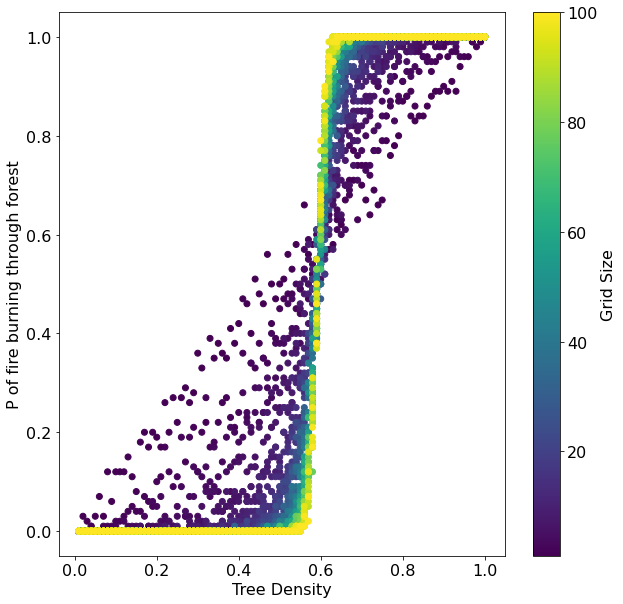

In [116]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_probs(ax, prob_means1, vmax=100)

popt = [0.49025594 0.6        1.03973491]
pcov = 
 [[ 0.00010804  0.         -0.00018506]
 [ 0.          0.          0.        ]
 [-0.00018506  0.          0.00074852]]


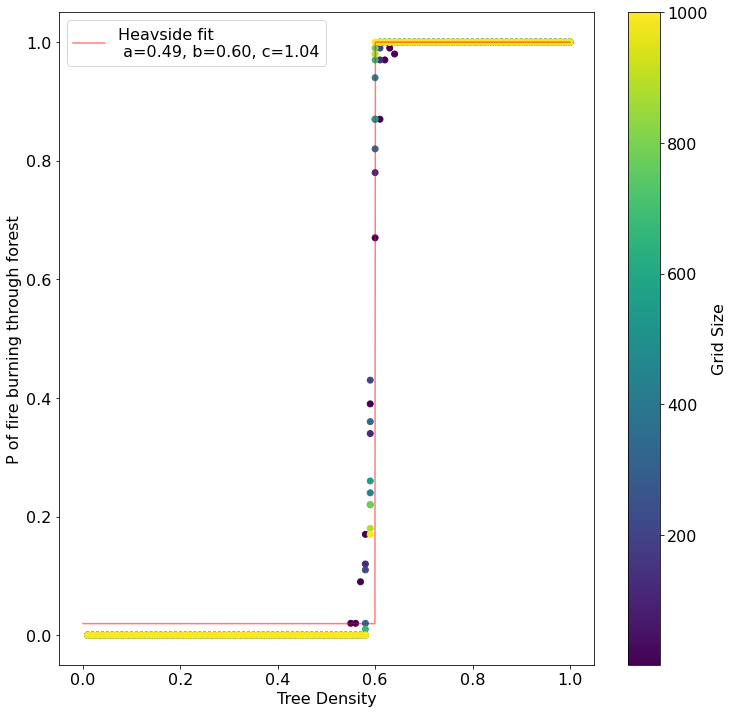

In [117]:
lg_data = pd.DataFrame()

for i in range (1, 101):
    new_data = pd.read_csv(f"large_grid_data/{i}_output.csv")
    new_data["seed"] = i
    lg_data = lg_data.append(new_data)

prob_means_lg = lg_data.groupby(["n","p"])["bottom_reached"].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 12))
plot_probs(ax, prob_means_lg, vmax=1000)


import numpy as np
from scipy.optimize import curve_fit
sel = prob_means_lg[prob_means_lg["n"] == 1000] 
xobs = sel["p"]

yobs = sel["bottom_reached"]

def f(x,a,b,c): return a * (np.sign(x-b) + c) # Heaviside fitting function

popt, pcov = curve_fit(f,xobs,yobs,bounds=([0.4,0.55,0.95],[0.5,0.65,1.05]))
print ('popt = %s' % popt)
print ('pcov = \n %s' % pcov)

x = np.linspace(0,1,1000)
ax.plot(x, f(x, a=popt[0], b=popt[1], c=popt[2]), color="red", label=f"Heavside fit \n a={popt[0]:.2f}, b={popt[1]:.2f}, c={popt[2]:.2f}", alpha=0.5)
ax.legend(loc="upper left")

In [118]:
# Fitting step function to data



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


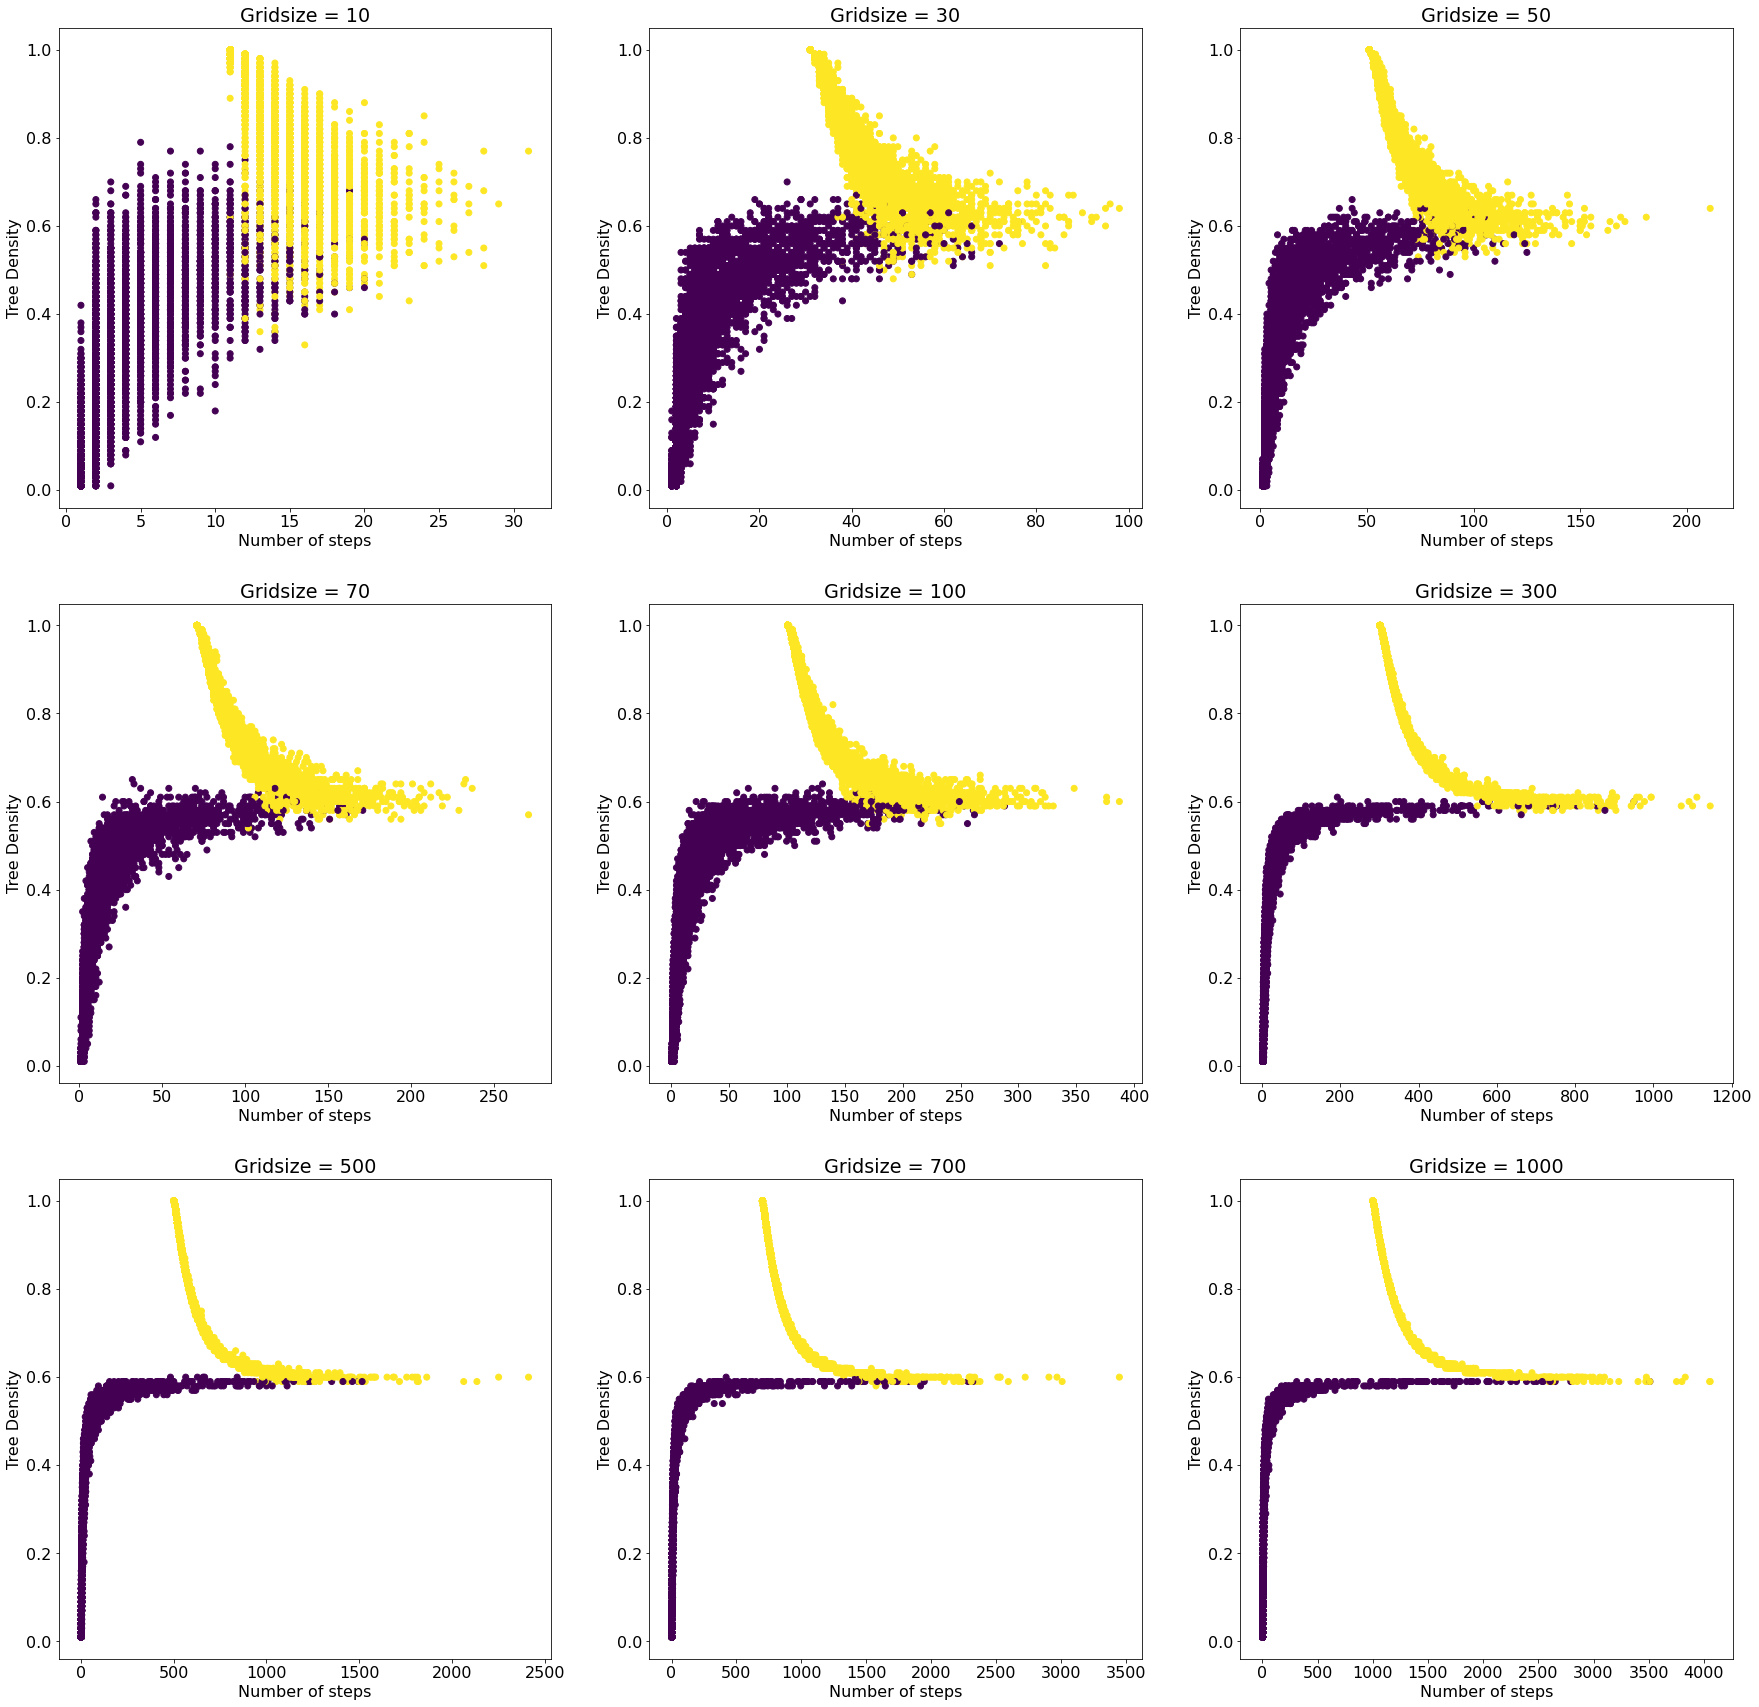

In [119]:
combined = dataset1.append(lg_data)


fig, axarr = plt.subplots(3,3, figsize=(30,30))
for i, n in enumerate([10,30,50,70,100,300, 500, 700, 1000]):
    ax = fig.axes[i]
    data = combined[combined["n"] == n]
    ax.scatter(x=data["n_steps"],y=data["p"], c=data["bottom_reached"])
    ax.set_title(f"Gridsize = {n}")
    ax.set_xlabel("Number of steps")
    ax.set_ylabel("Tree Density")
    


In [120]:
from glob import glob

def read_wind_data(direction):
    df = pd.DataFrame()
    files = glob(f"wind_data/*_{direction}_output.csv")
    for file in files:
        new_data = pd.read_csv(file)
        df = df.append(new_data)
    return df

south_data = read_wind_data("S")



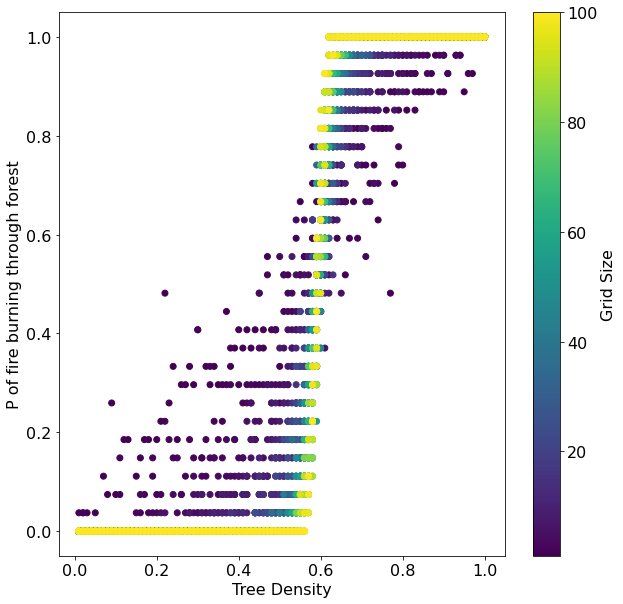

In [121]:
fig2, ax2 = plt.subplots(figsize=(10, 10))
south_probs = south_data.groupby(["n","p"])["bottom_reached"].mean().reset_index()
plot_probs(ax2, south_probs)

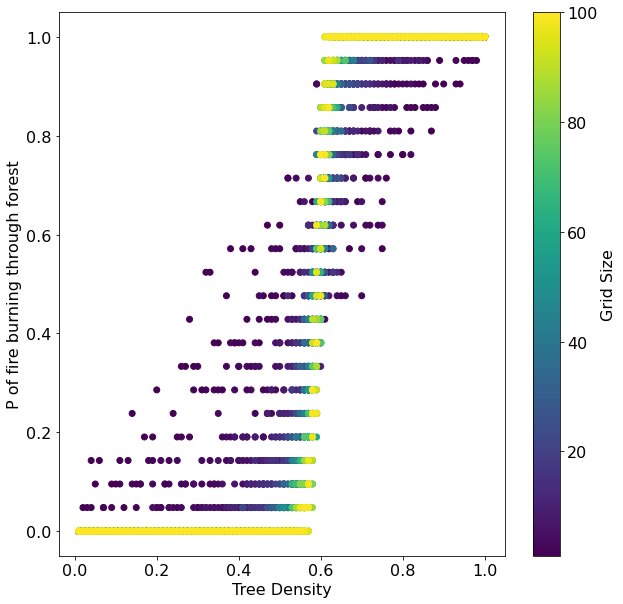

In [122]:
fig3, ax3 = plt.subplots(figsize=(10, 10))

north_data = read_wind_data("N")
north_probs = north_data.groupby(["n","p"])["bottom_reached"].mean().reset_index()
plot_probs(ax3, north_probs)

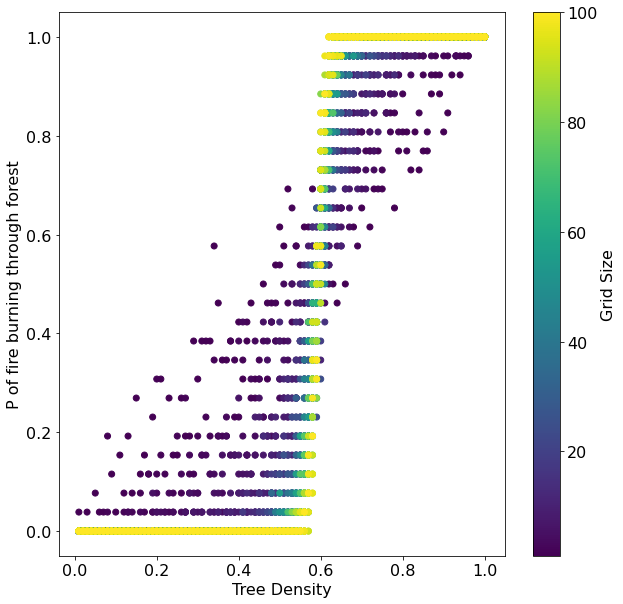

In [123]:
fig4, ax4 = plt.subplots(figsize=(10, 10))
west_data = read_wind_data("W")
west_probs = west_data.groupby(["n","p"])["bottom_reached"].mean().reset_index()
plot_probs(ax4, west_probs)

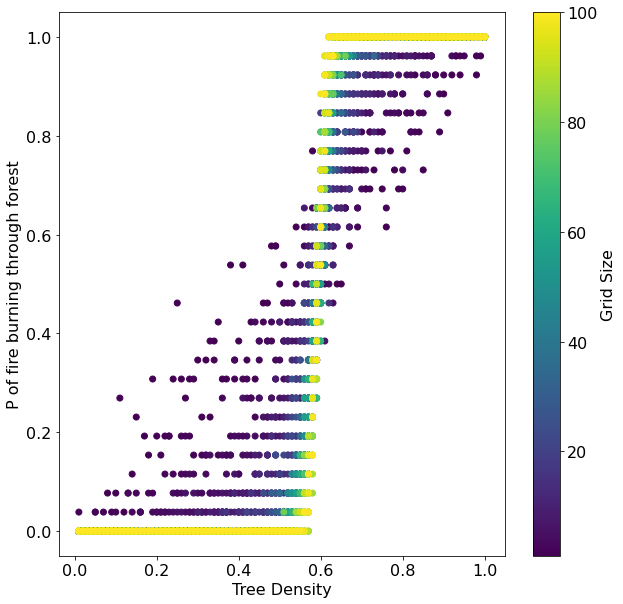

In [124]:
fig5, ax5 = plt.subplots(figsize=(10, 10))
east_data = read_wind_data("E")
east_probs = east_data.groupby(["n","p"])["bottom_reached"].mean().reset_index()
plot_probs(ax5, east_probs)


In [125]:
east_probs

,n,p,bottom_reached
0,1,0.010000,0.038462
1,1,0.020000,0.000000
2,1,0.030000,0.000000
3,1,0.040000,0.000000
4,1,0.050000,0.038462
...,...,...,...
9995,100,0.959999,1.000000
9996,100,0.969999,1.000000
9997,100,0.979999,1.000000
9998,100,0.989999,1.000000


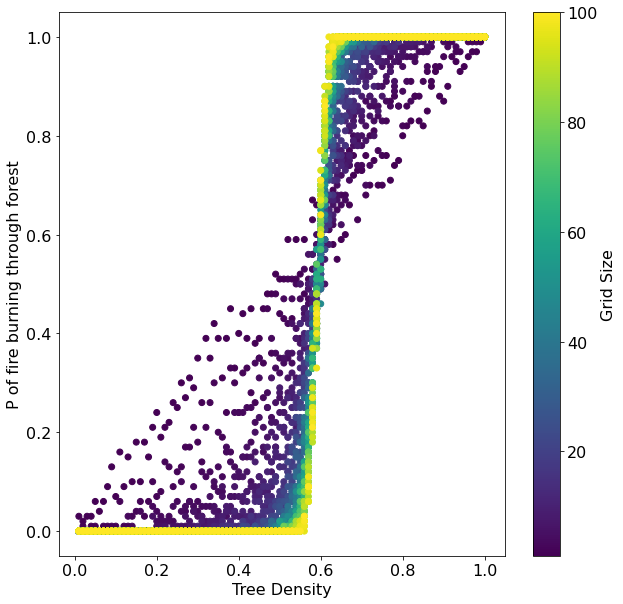

In [126]:
fig6, ax6 = plt.subplots(figsize=(10, 10))
dataset2 = read_wind_data("*")

dataset2

prob_means2 = dataset2.groupby(["n","p"])["bottom_reached"].mean().reset_index()

plot_probs(ax6, prob_means2)

MovieWriter ffmpeg unavailable; using Pillow instead.


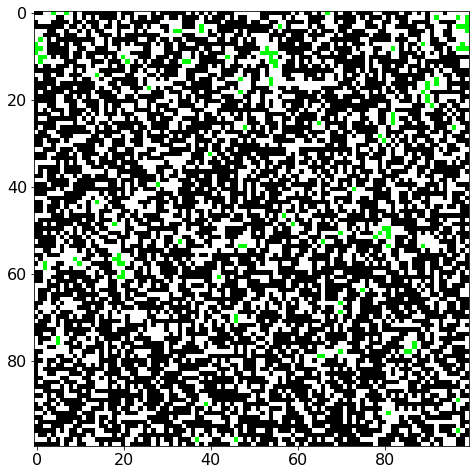

In [127]:
# %matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from glob import glob

plt.rcParams.update({'font.size': 16})



# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots( figsize=(8,8) )

im = ax.imshow(np.zeros((100,100)))

def animate_func(i):
    grid = pd.read_csv(f"testdata/windtest_{i}_test.csv", dtype=int).values
    palette = np.array([[255, 255, 255], # white - no tree
                        [0, 255, 0], # green - living tree
                        [255, 0, 0], # red - burning tree
                        [0, 0, 0]]) # black - burnt tree

    RGB = palette[np.array(grid)]
    return im.set_data(RGB)

anim = animation.FuncAnimation(
                               fig, 
                               animate_func,
                                frames=len(glob("testdata/*.csv")),  
                               )

anim.save('test_anim.gif', fps=5)


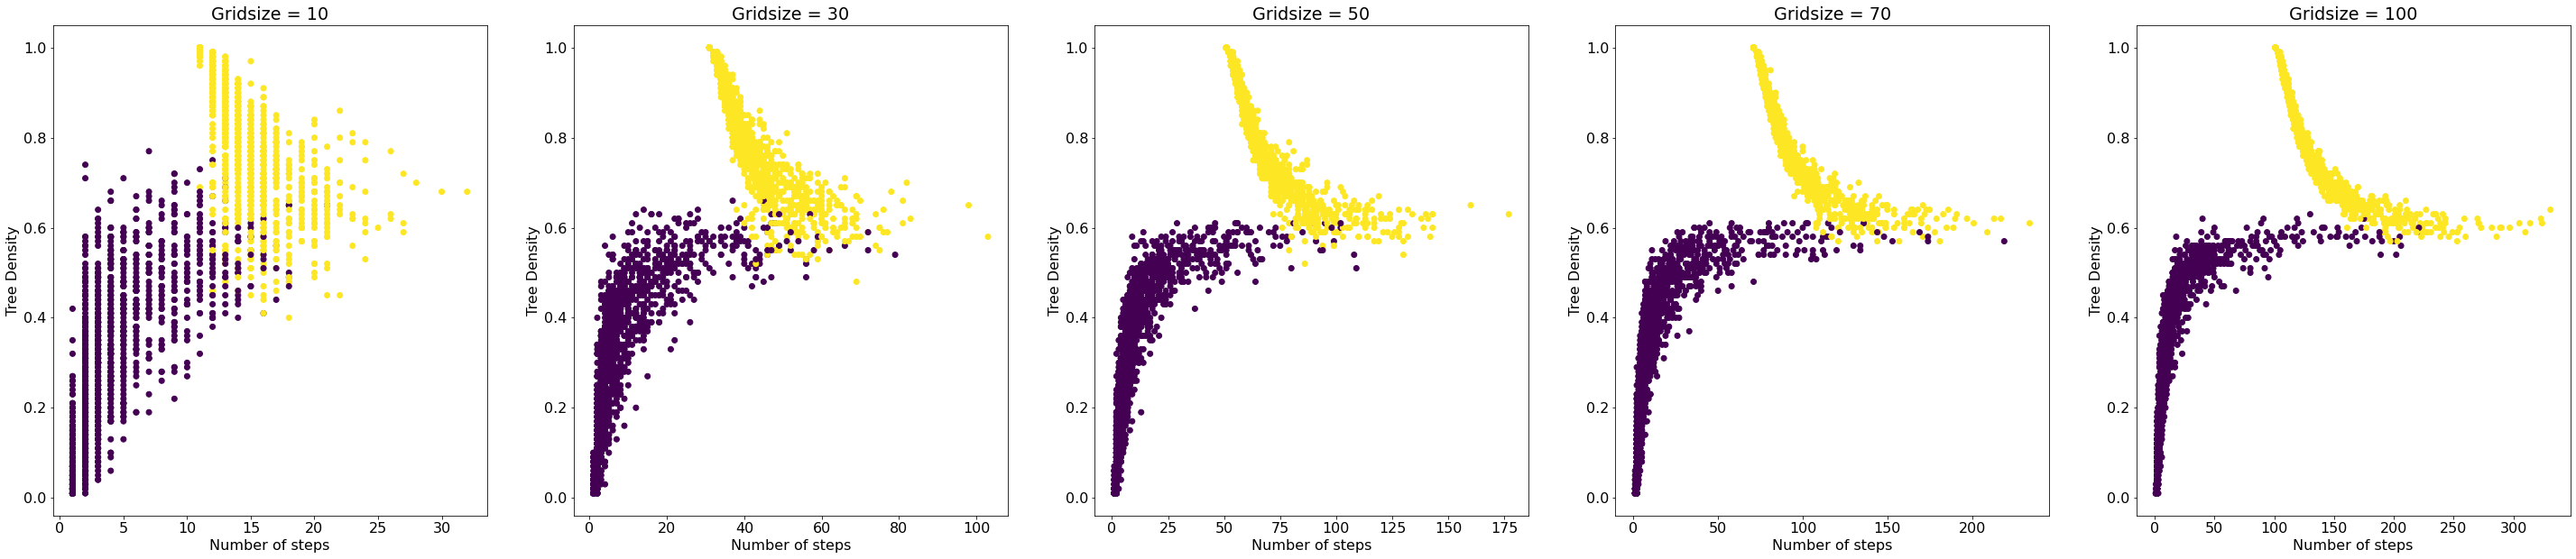

In [128]:

def arr_plot_wind(w_data):
    fig, axarr = plt.subplots(1,5, figsize=(50,10))
    for i, n in enumerate([10,30,50,70,100]):
        ax = fig.axes[i]
        data = w_data[w_data["n"] == n]
        ax.scatter(x=data["n_steps"],y=data["p"], c=data["bottom_reached"])
        ax.set_title(f"Gridsize = {n}")
        ax.set_xlabel("Number of steps")
        ax.set_ylabel("Tree Density")

arr_plot_wind(south_data)

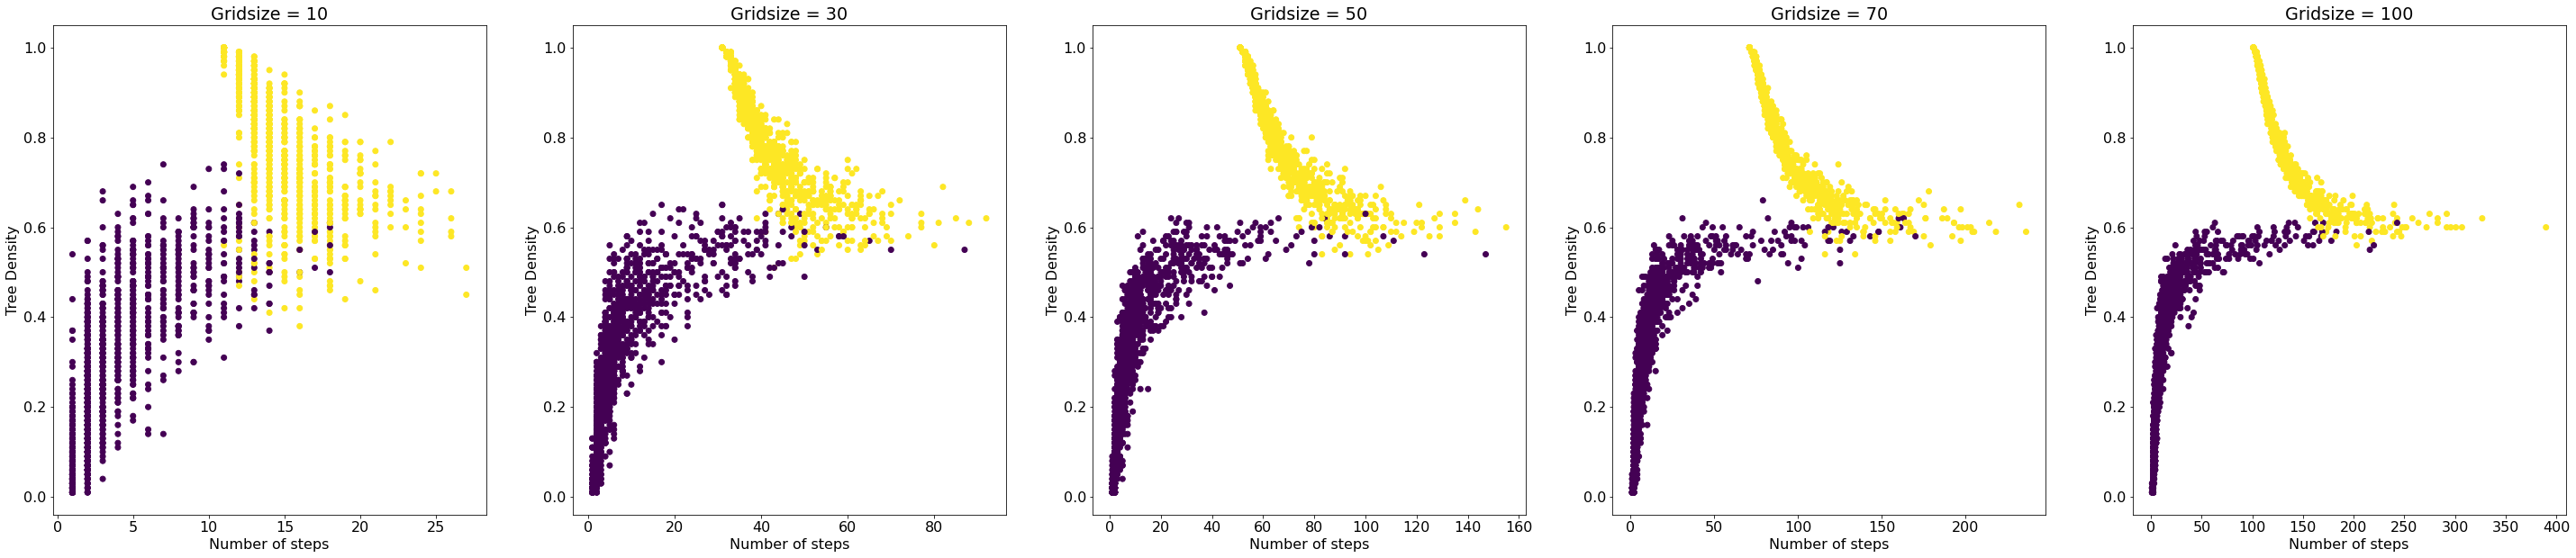

In [129]:
arr_plot_wind(north_data)

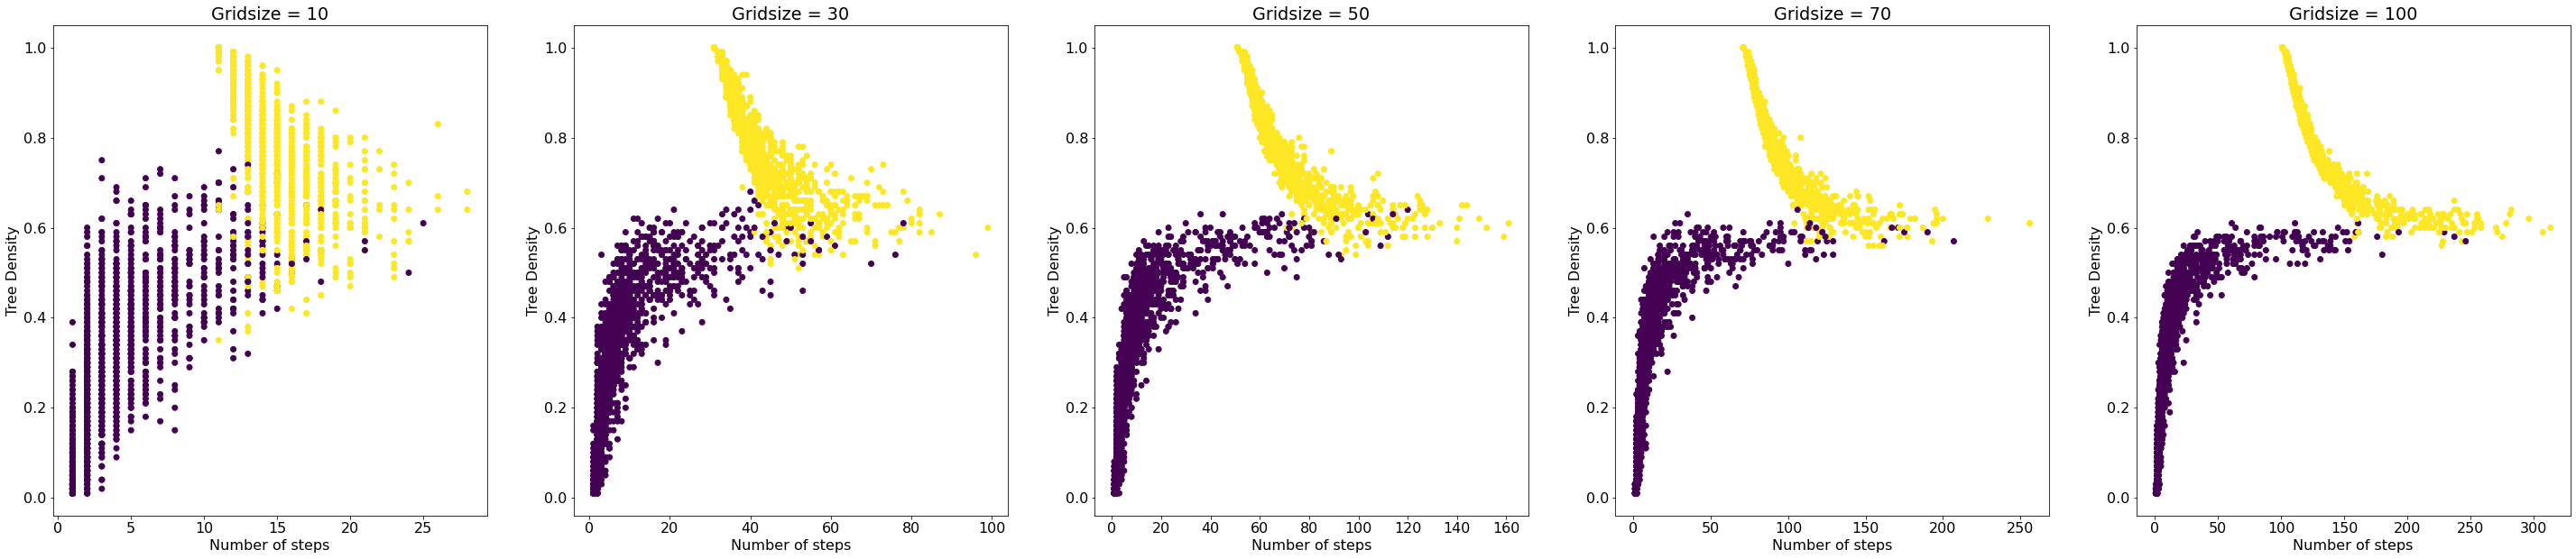

In [130]:
arr_plot_wind(west_data)

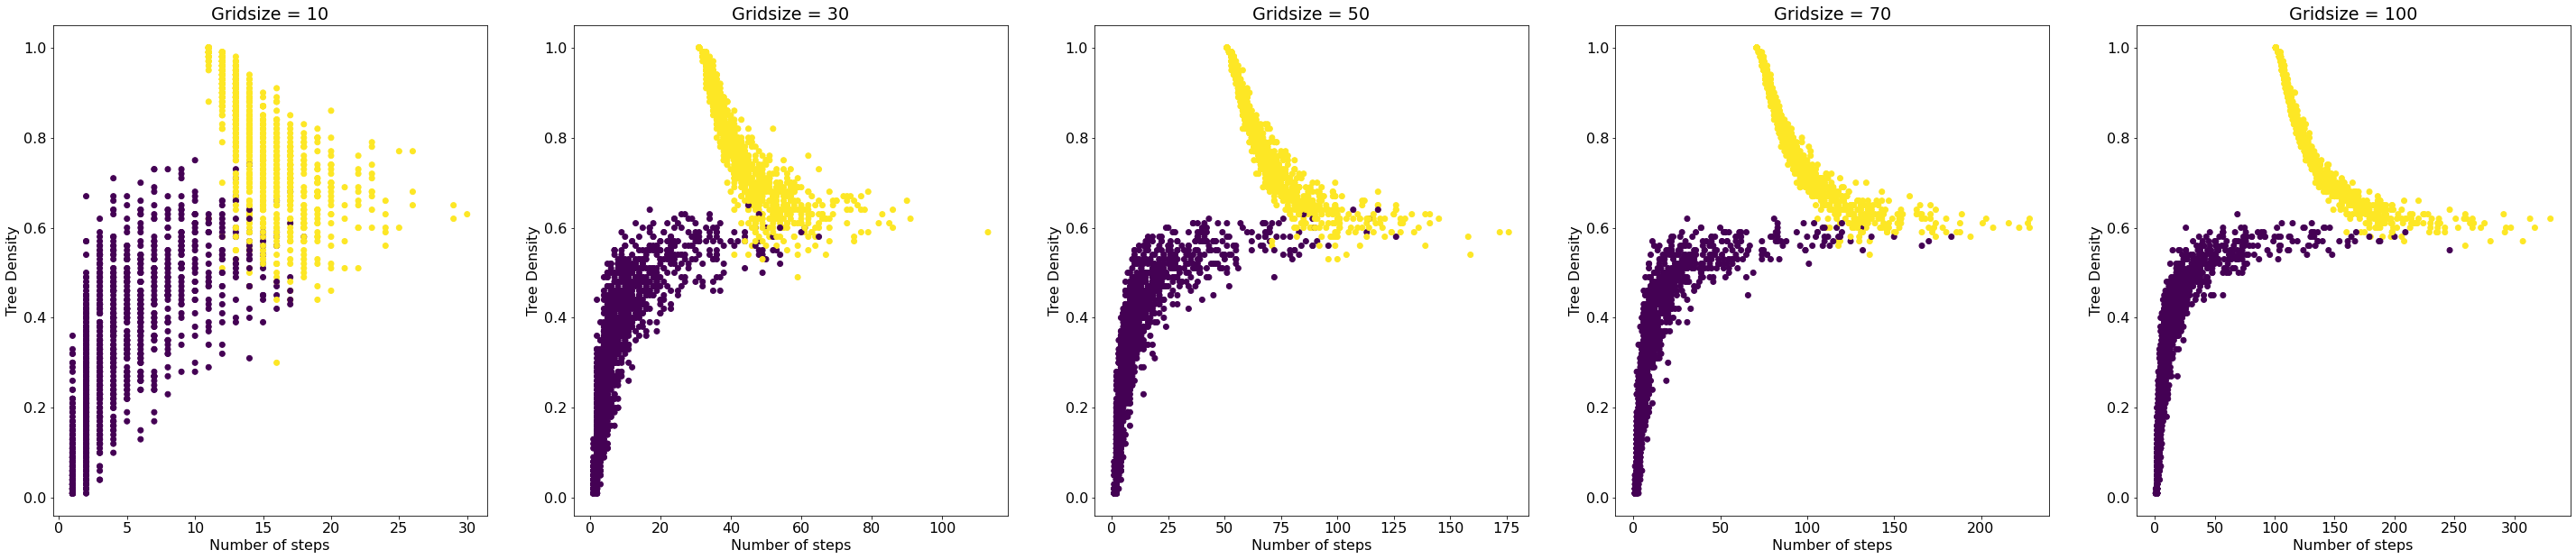

In [131]:
arr_plot_wind(east_data)

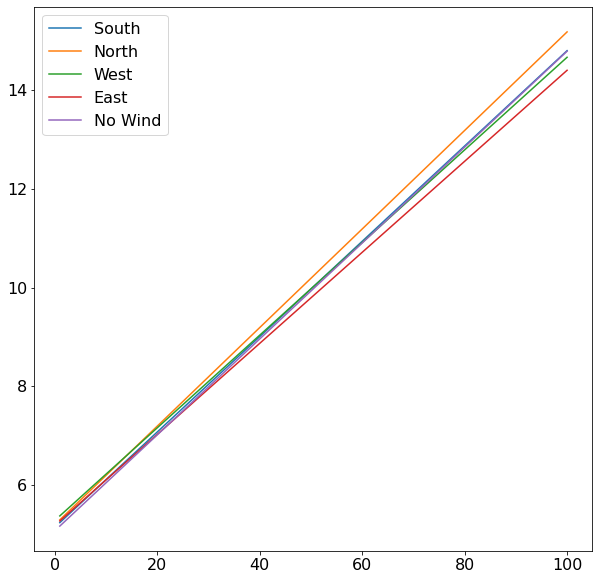

In [132]:

def comapre_avg(p):

    fig, ax = plt.subplots(figsize=(10, 10))
    south_means = south_data[south_data["p"] ==p].groupby(["n"]).mean().reset_index()
    north_means = north_data[north_data["p"] ==p].groupby(["n"]).mean().reset_index()
    west_means = west_data[west_data["p"] == p].groupby(["n"]).mean().reset_index()
    east_means = east_data[east_data["p"] == p].groupby(["n"]).mean().reset_index()
    no_wind = dataset1[dataset1["p"] == p].groupby(["n"]).mean().reset_index()

    for direc in [south_means, north_means, west_means, east_means, no_wind]:
        ax.plot(direc["n"], np.poly1d(np.polyfit(direc["n"], direc["n_steps"], 1))(direc["n"]))

    ax.legend(["South", "North", "West", "East", "No Wind"])

comapre_avg(0.4)

In [6]:
import pandas as pd

df = pd.read_csv("per_data/1_S_output.csv")
df["speedup"] = 0

for i, row in df.iterrows():
    df["speedup"][i] = df[(df["p"]==row["p"]) & (df["n"]==row["n"]) & (df["n_threads"]==1)]["time"].values[0]/row["time"]



/tmp/ipykernel_3133301/257510964.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["speedup"][i] = df[(df["p"]==row["p"]) & (df["n"]==row["n"]) & (df["n_threads"]==1)]["time"].values[0]/row["time"]


,n,p,n_steps,time,bottom_reached,n_threads,speedup
996,100,0.7,141,0.362591,1,1,1
1996,100,0.7,144,0.004324,1,2,83
2996,100,0.7,165,0.004429,1,3,81
3996,100,0.7,155,0.005777,1,4,62
4996,100,0.7,141,0.004169,1,5,86
5996,100,0.7,155,0.004345,1,6,83
6996,100,0.7,153,0.004557,1,7,79
7996,100,0.7,159,0.004411,1,8,82
8996,100,0.7,149,0.004335,1,9,83
9996,100,0.7,150,0.004303,1,10,84


In [7]:
df[(df["p"]== 0.7) & (df["n"]==50)]

,n,p,n_steps,time,bottom_reached,n_threads,speedup
496,50,0.7,95,0.244374,1,1,1
1602,50,0.7,78,0.000601,1,2,406
2541,50,0.7,72,0.000605,1,3,403
3692,50,0.7,75,0.000933,1,4,261
4557,50,0.7,73,0.000577,1,5,423
5651,50,0.7,70,0.000615,1,6,397
6542,50,0.7,92,0.001013,1,7,241
7646,50,0.7,73,0.001081,1,8,225
8542,50,0.7,73,0.002359,1,9,103
9712,50,0.7,74,0.003036,1,10,80


Text(0, 0.5, 'Average Speedup (s)')

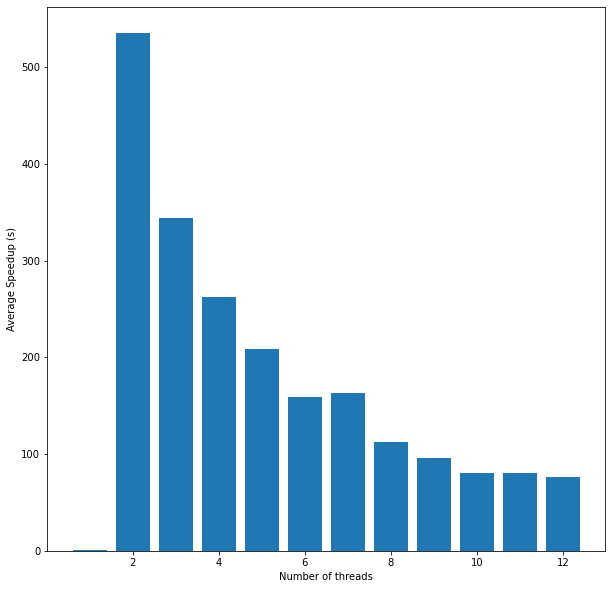

In [4]:
import numpy as np
import matplotlib.pyplot as plt
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
avgs = df.groupby(["n_threads"])["speedup"].mean()

fig, ax = plt.subplots(figsize=(10, 10))

ax.bar(avgs.index, avgs.values)
ax.set_xlabel("Number of threads")
ax.set_ylabel("Average Speedup (s)")

